현재 캐글 titanic에 올라와있는 코드를 따라하면 학습해봤습니다.

1) Libraries & Toolkits

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,8)} ,font_scale=1.2)

2) Importing Dataset and exploration

In [3]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test  = pd.read_csv('test.csv')
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# - Number of uniques values in dataframe

pd.DataFrame({'': train.nunique().index , 'Number of unique values':  train.nunique().values})

,,Number of unique values
0,PassengerId,891
1,Survived,2
2,Pclass,3
3,Name,891
4,Sex,2
5,Age,88
6,SibSp,7
7,Parch,7
8,Ticket,681
9,Fare,248


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


3) Exploratory data analysis

In [10]:
train[train.Sex == 'male' ]['Survived'].value_counts(normalize=True).mul(100).round(0).astype(str) + ' %'

0    81.0 %
1    19.0 %
Name: Survived, dtype: object

In [11]:
train[train.Sex == 'female' ]['Survived'].value_counts(normalize=True).mul(100).round(0).astype(str) + ' %'

1    74.0 %
0    26.0 %
Name: Survived, dtype: object

<AxesSubplot:xlabel='Survived', ylabel='count'>

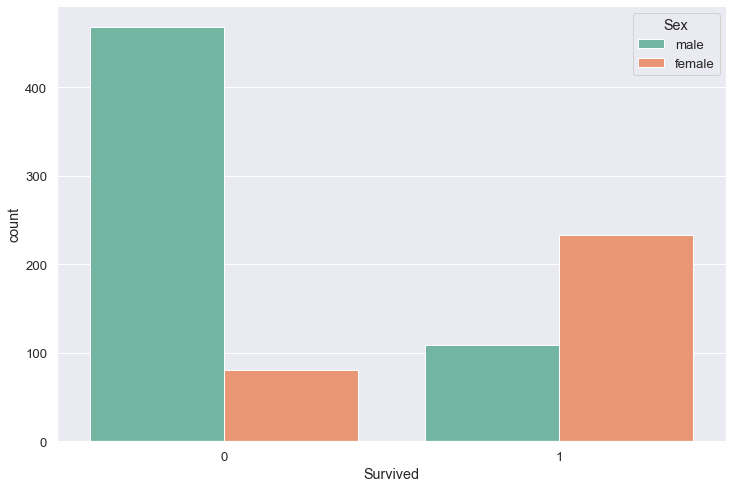

In [12]:
sns.countplot(data=train, x='Survived', hue='Sex' , palette='Set2')

<AxesSubplot:xlabel='Survived', ylabel='count'>

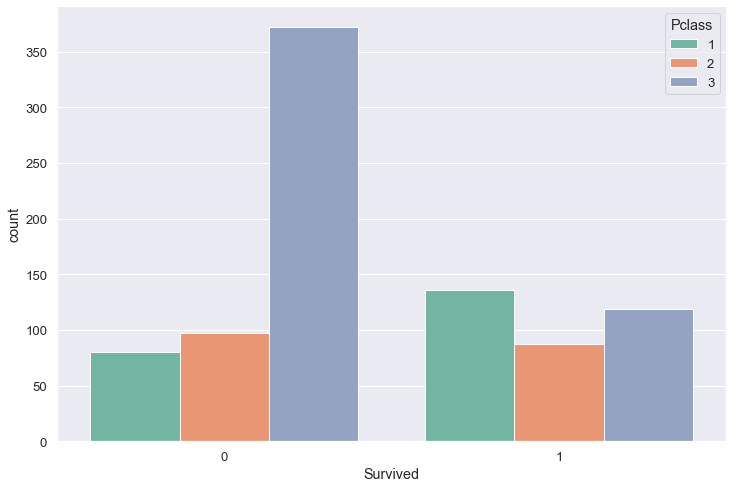

In [13]:
sns.countplot(data=train, hue='Pclass', x='Survived', palette='Set2')

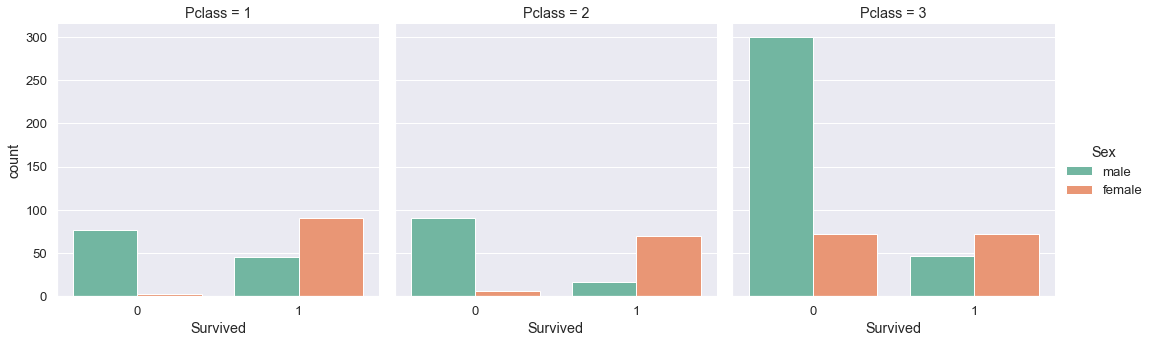

In [14]:
sns.catplot(data=train, x='Survived', hue='Sex', kind='count', col='Pclass' , palette='Set2')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

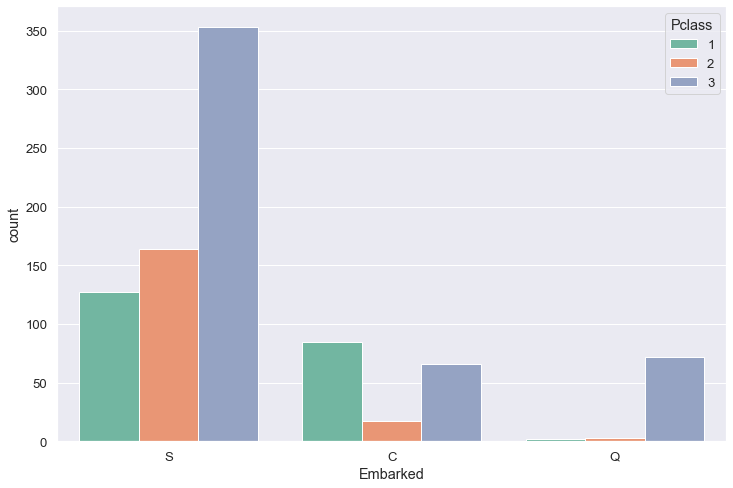

In [15]:
sns.countplot(data=train, x='Embarked', hue='Pclass' , palette='Set2')

<AxesSubplot:xlabel='Age', ylabel='Density'>

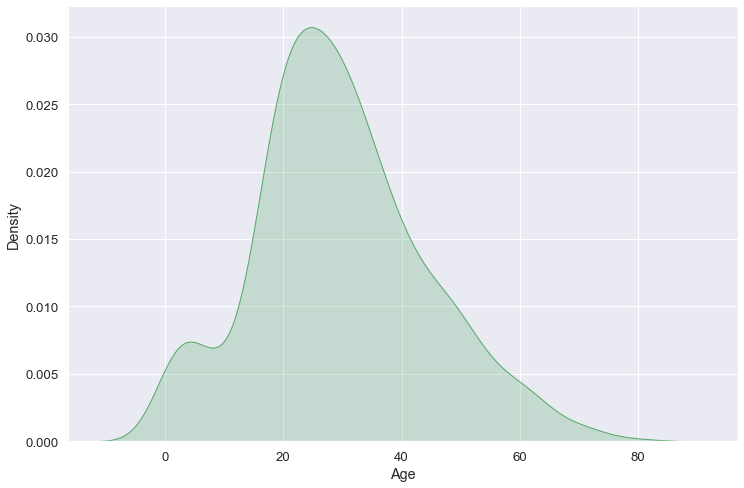

In [16]:
sns.kdeplot(train['Age'], shade=True, color='g')

4) Pre-processing & Feature Engineering

In [17]:
## Fill Nan Values
train['Age'] = train['Age'].fillna(round(train['Age'].mean()))
test['Age'] = test['Age'].fillna(round(test['Age'].mean()))
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().idxmax())
test['Fare'] = test['Fare'].fillna(test['Fare'].value_counts().idxmax())

In [18]:
def title(name):
    return name.split(',')[1].split('.')[0]

def age_categories(age):
    if age <= 3:
        return 'Infant'
    elif age <= 14 :
        return 'Child'
    elif age <= 28 :
        return 'Youth'
    elif age <= 60 :
        return 'Adult'
    else :
        return 'Old Adult'

In [19]:
train['Title'] = train['Name'].apply(title)
test['Title'] = test['Name'].apply(title)

In [20]:
train['Alone'] = train['SibSp'] + train['Parch']
test['Alone'] = test['SibSp'] + test['Parch']
train.Alone = train.Alone.apply(lambda x : 'Yes' if x == 0 else 'No')
test.Alone = test.Alone.apply(lambda x : 'Yes' if x == 0 else 'No')

In [21]:
train['Age_Group'] = train['Age'].apply(age_categories)
test['Age_Group'] = test['Age'].apply(age_categories)
train = train.drop(columns=['Name' , 'Cabin' , 'PassengerId'])
test = test.drop(columns=['Name' , 'Cabin'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Alone,Age_Group
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,No,Youth
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,No,Adult
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Yes,Youth
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,No,Adult
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr,Yes,Adult


In [22]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Alone,Age_Group
0,892,3,male,34.5,0,0,330911,7.8292,Q,Mr,Yes,Adult
1,893,3,female,47.0,1,0,363272,7.0000,S,Mrs,No,Adult
2,894,2,male,62.0,0,0,240276,9.6875,Q,Mr,Yes,Old Adult
3,895,3,male,27.0,0,0,315154,8.6625,S,Mr,Yes,Youth
4,896,3,female,22.0,1,1,3101298,12.2875,S,Mrs,No,Youth


In [23]:
lbl=LabelEncoder()
data = [train , test]
nums = []
for dataset in data:
    for col in dataset.loc[ : , dataset.dtypes == np.object].columns:
        dataset[col] = lbl.fit_transform(dataset[col])
        directory = {label: index for index , label  in enumerate(lbl.classes_)}
        nums.append(directory)
nums[0]

{'female': 0, 'male': 1}

In [24]:
train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Alone,Age_Group
688,0,3,1,18.0,0,0,403,7.7958,2,11,1,4
106,1,3,0,21.0,0,0,296,7.6500,2,8,1,4
311,1,1,0,18.0,2,2,602,262.3750,0,8,0,4
47,1,3,0,30.0,0,0,76,7.7500,1,8,1,0
735,0,3,1,28.5,0,0,495,16.1000,2,11,1,0


In [25]:
test.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Alone,Age_Group
333,1225,3,0,19.0,1,1,96,15.7417,0,6,0,4
139,1031,3,1,40.0,1,6,294,46.9000,2,5,0,0
401,1293,2,1,38.0,1,0,128,21.0000,2,5,0,0
341,1233,3,1,32.0,0,0,213,7.5792,2,5,1,0
200,1092,3,0,30.0,0,0,229,15.5000,1,4,1,0


5) Modeling

In [26]:
x_train = train.drop("Survived", axis=1)
y_train = train[["Survived"]]
x_test  = test.drop(columns=['PassengerId']).copy()

x_train.shape, y_train.shape, x_test.shape 

((891, 11), (891, 1), (418, 11))

In [27]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

model = rfc.fit(x_train , y_train)
pred = model.predict(x_test)

print("Accuracy on Test Data : {:,.2f}".format(rfc.score(x_train , y_train) *100 ) , '%')

Accuracy on Test Data : 85.75 %


In [28]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred
    })
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
# submission.to_csv('submission.csv', index=False)